# CSE 6367 Programming Assignment 3 (P3)

## Spring 2023

## Eigenfaces

### Task 1 (30 points)
1. Load all the 25 images in the "\Eigenfaces\Train"
2. Display all the original faces in a 5X5 grid. Resize the images to 100X100 pixels for display only.
3. Find the mean face image. Perform PCA on the training faces.
4. Display the mean face. Resize the mean face to 100X100 pixels for display only
5. Diplay all the eigenfaces in a 5X5 grid.

Part 1

In [1]:
import os
from skimage import io
from skimage.transform import resize

train_dir = "Eigenfaces/Train"
train_images = [io.imread(os.path.join(train_dir, filename)) for filename in os.listdir(train_dir)]

Part 2

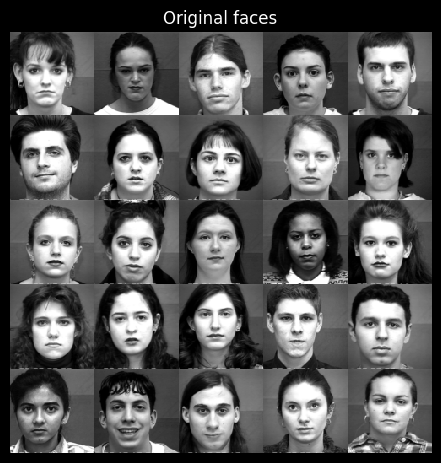

In [2]:
import numpy as np
import matplotlib.pyplot as plt

grid_side = 5
img_size = (100, 100)

resized_train_images = list(resize(image, img_size) for image in train_images)
grid_list = list(resized_train_images[k*grid_side:(k+1)*grid_side] for k in range(grid_side))
grid_stack = np.vstack([np.hstack(row) for row in grid_list])

plt.figure(facecolor='black')
io.imshow(grid_stack)
plt.axis('off')
plt.title('Original faces', color='white')
plt.show()

Part 3

In [3]:
from sklearn.decomposition import PCA

flatten_train_images = list(image.flatten() for image in resized_train_images)
mean_face = np.mean(flatten_train_images, axis=0).reshape(img_size)

principal_component_analysis = PCA(n_components=len(flatten_train_images))
principal_component_analysis.fit(flatten_train_images)

PCA(n_components=25)

Part 4

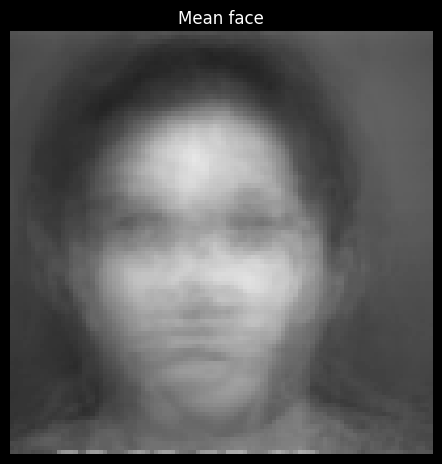

In [4]:
resized_mean_face = resize(mean_face, img_size)

plt.figure(facecolor='black')
io.imshow(resized_mean_face)
plt.axis('off')
plt.title('Mean face', color='white')
plt.show()

Part 5

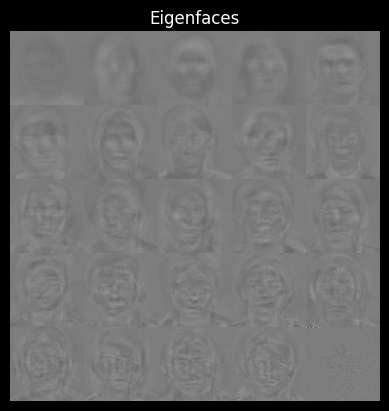

In [5]:
eigenfaces = principal_component_analysis.components_.reshape(-1, img_size[0], img_size[1])
# rescaled_eigenfaces = (eigenfaces - np.min(eigenfaces)) / (np.max(eigenfaces) - np.min(eigenfaces)) * 255
# resized_eigenfaces = list(resize(image, img_size) for image in rescaled_eigenfaces.astype(np.uint8))
resized_eigenfaces = list(resize(image, img_size) for image in eigenfaces)
grid_list = list(resized_eigenfaces[k*grid_side:(k+1)*grid_side] for k in range(grid_side))
grid_stack = np.vstack([np.hstack(row) for row in grid_list])

plt.figure(facecolor='black')
plt.imshow(grid_stack, cmap='gray')
plt.axis('off')
plt.title('Eigenfaces', color='white')
plt.show()

### Task 2 (30 points)

1. Select k = 2 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
2. Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
3. Repeat the process for k = 5 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.

Part 1

In [6]:
from PIL import Image

train_images = list(Image.open(os.path.join(train_dir, filename)) for filename in os.listdir(train_dir))
flatten_train_images = list(np.asarray(image.convert('L').resize(img_size)).flatten() for image in train_images)

k = 2
pca = PCA(n_components=k)
pca.fit(flatten_train_images)
eigenfaces = pca.components_
eigenvectors = eigenfaces[:k]

Part 2

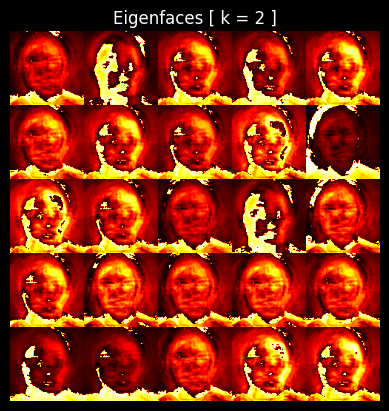

In [7]:
reconstruct = lambda vec, img: np.dot(vec.T, np.dot(vec, img.reshape(-1, 1)))

reconstructed_train_images = list()
for image in train_images:
  image = np.asarray(image.convert('L').resize(img_size))
  reconstructed_train_images.append(reconstruct(eigenvectors, image).reshape(image.shape).astype(np.uint8))

resized_reconstructed_train_images = list(Image.fromarray(image.reshape(img_size)) for image in reconstructed_train_images)
grid_list = list(reconstructed_train_images[k*grid_side:(k+1)*grid_side] for k in range(grid_side))
grid_stack = np.vstack([np.hstack(row) for row in grid_list])

plt.figure(facecolor='black')
plt.imshow(grid_stack, cmap='hot')
plt.axis('off')
plt.title(f'Eigenfaces [ k = {k} ]', color='white')
plt.show()

Part 3

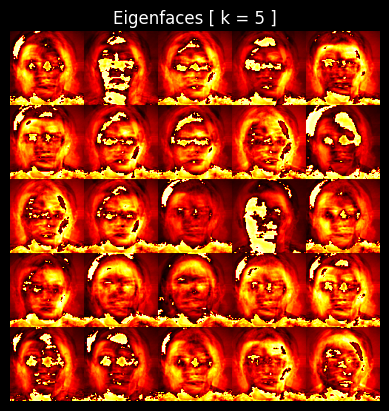

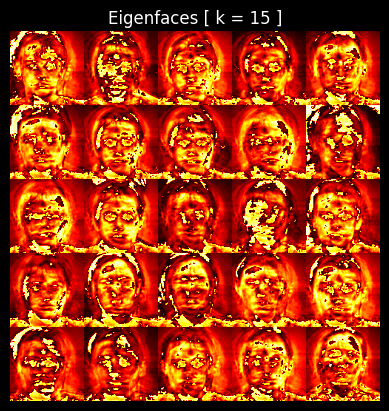

In [8]:
for k in (5, 15):
  pca = PCA(n_components=k)
  pca.fit(flatten_train_images)
  eigenfaces = pca.components_
  eigenvectors = eigenfaces[:k]

  reconstructed_train_images = list()
  for image in train_images:
    image = np.asarray(image.convert('L').resize(img_size))
    reconstructed_train_images.append(reconstruct(eigenvectors, image).reshape(image.shape).astype(np.uint8))

  resized_reconstructed_train_images = list(Image.fromarray(image.reshape(img_size)) for image in reconstructed_train_images)
  grid_list = list(reconstructed_train_images[k*grid_side:(k+1)*grid_side] for k in range(grid_side))
  grid_stack = np.vstack([np.hstack(row) for row in grid_list])

  plt.figure(facecolor='black')
  plt.imshow(grid_stack, cmap='hot')
  plt.axis('off')
  plt.title(f'Eigenfaces [ k = {k} ]', color='white')
  plt.show()
  print(end="\n\n")

### Task 3 (40 points)
1. Load all the test images from "\Eigenfaces\Test"
2. Project each image on the k = 2 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
3. Display all the results in an M X 2 table, where M is total no of test images. Each row of the table displays two images. The image on the left is the test image. The image on the right is it's closest image in the eigenfaces space. If an image is classified as a non-face, then the second column in the table should be blank.
4. Repeat the process and display the results for k = 5, k = 15.

Part 1

In [9]:
test_dir = 'Eigenfaces/Test'
test_images = list(Image.open(os.path.join(test_dir, filename)) for filename in os.listdir(test_dir))

Part 2

In [10]:
flatten_test_images = list(np.asarray(image.convert('L').resize(img_size)).flatten() for image in test_images)
labels = list(image.mode == 'L' for image in test_images)

closest_match = lambda trained_model, test_image: train_images[np.argmin(np.linalg.norm(trained_model - test_image, axis=1))].resize(img_size)
get_test_image = lambda image_index: test_images[image_index].convert('L').resize(img_size)
blank_image = Image.new(mode='L', size=img_size, color=255)

k = 2
pca = PCA(n_components=k)
training_model = pca.fit_transform(flatten_train_images)
testing_model = pca.transform(flatten_test_images)

table = list([get_test_image(i), closest_match(training_model, image)] if labels[i] else [get_test_image(i), blank_image] for i, image in enumerate(testing_model))

Part 3

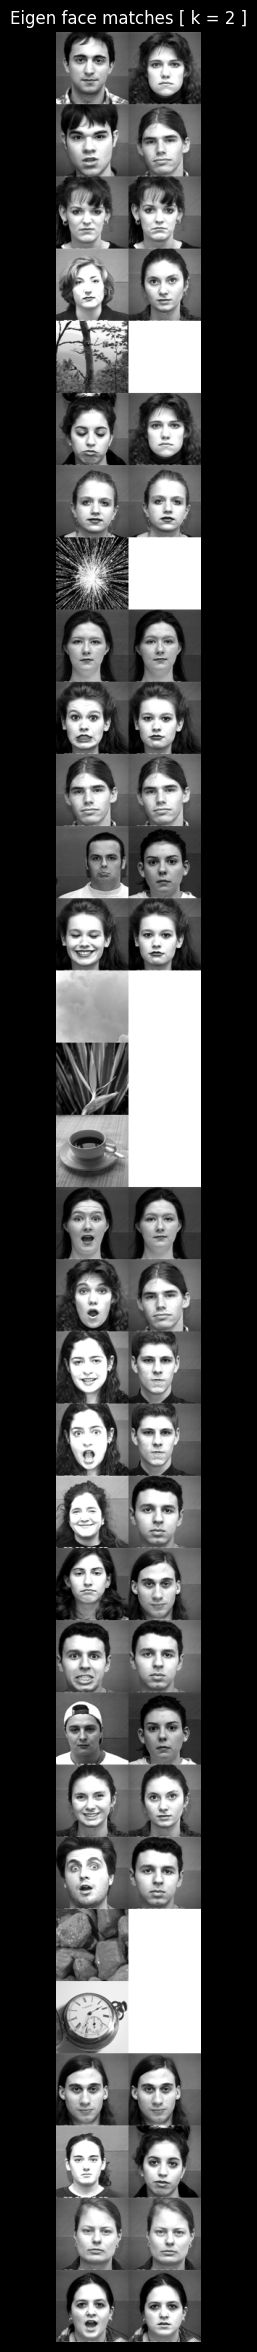

In [11]:
grid_stack = np.vstack([np.hstack(row) for row in table])
plt.figure(facecolor='black', figsize=(30, 30))
plt.imshow(grid_stack, cmap='gray')
plt.axis('off')
plt.title(f'Eigen face matches [ k = {k} ]', color='white')
plt.show()

Part 4

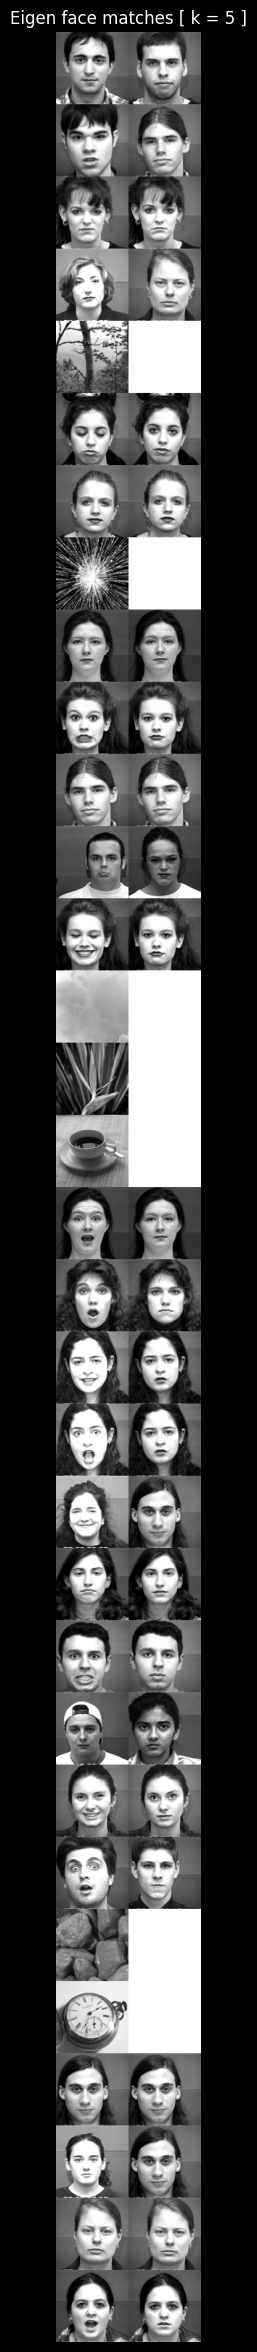

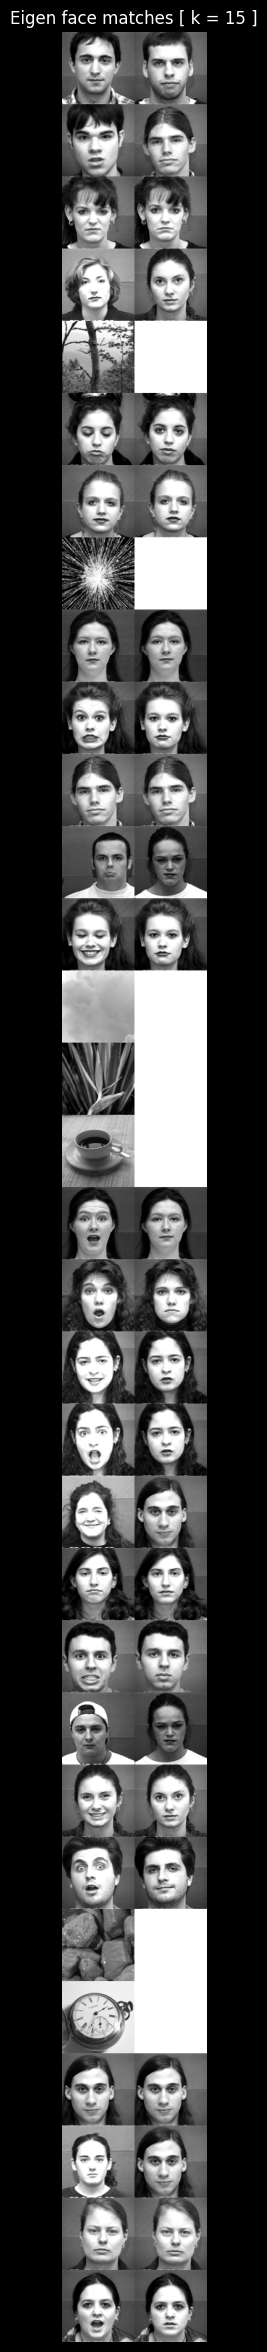

In [12]:
for k in (5, 15):
  pca = PCA(n_components=k)
  training_model = pca.fit_transform(flatten_train_images)
  testing_model = pca.transform(flatten_test_images)

  table = list([get_test_image(i), closest_match(training_model, image)] if labels[i] else [get_test_image(i), blank_image] for i, image in enumerate(testing_model))
  grid_stack = np.vstack([np.hstack(row) for row in table])

  plt.figure(facecolor='black', figsize=(30, 30))
  plt.imshow(grid_stack, cmap='gray')
  plt.axis('off')
  plt.title(f'Eigen face matches [ k = {k} ]', color='white')
  plt.show()
  print(end="\n\n")

Assignment Courtesy: Prof. Farhad Kamangar, CSE@UTA